[2024.01.08]  
This file is to compare the predictive performance of aware and blind model.   
I revised the function of plot_pvalues() to merge all the plots on to one same canvas.  
The original function in the function.py file is not changed.

In [180]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,roc_auc_score,classification_report,\
    confusion_matrix,roc_curve,precision_score,recall_score, matthews_corrcoef
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2_contingency, chi2, pointbiserialr
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# import the user-defined functions
from functions import *

In [181]:
# write a function to plot the p-values
def plot_pvalues(threshold, p_values):
    # plot the threshold vs. p-values
    # plt.figure(figsize=(6, 6))
    plt.plot(threshold, p_values)
    plt.xlabel('Threshold')
    plt.ylabel('P-values')
    plt.title('Threshold vs. P-values')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.grid()
    # plt.show()

In [182]:
nn_blind = pd.read_csv('../03_outputs/02_tables/11_NN_outcome_wo_procted_1111_blind.csv')
nn_aware = pd.read_csv('../03_outputs/02_tables/11_NN_outcome_w_procted_1111_aware.csv')

In [183]:
lr_blind = pd.read_csv('../03_outputs/02_tables/11_logreg_outcome_wo_procted_1111.csv')
lr_aware = pd.read_csv('../03_outputs/02_tables/11_logreg_outcome_w_procted_1111.csv')

In [184]:
# change the race vairable's level names
# I merged the pacific islander to native
for data in [nn_blind,nn_aware,lr_blind,lr_aware]:
    data.loc[data["X1RACE"] == "White, non-Hispanic","X1RACE"] = "white"
    data.loc[data["X1RACE"] == "Black/African-American, non-Hispanic","X1RACE"] = "black"
    data.loc[data["X1RACE"] == "Hispanic, race specified","X1RACE"] = "hispanic"
    data.loc[data["X1RACE"] == "Hispanic, no race specified","X1RACE"] = "hispanic"
    data.loc[data["X1RACE"] == "Asian, non-Hispanic","X1RACE"] = "asian"
    data.loc[data["X1RACE"] == "Amer. Indian/Alaska Native, non-Hispanic","X1RACE"] = "native"
    data.loc[data["X1RACE"] == "Native Hawaiian/Pacific Islander, non-Hispanic","X1RACE"] = "native"
    data.loc[data["X1RACE"] == "More than one race, non-Hispanic","X1RACE"] = "other"
    
    # change the name of column "y_pred_prob" and "X4EVERDROP"
    data.rename(columns={'y_pred_prob':'prob','X4EVERDROP':'true'}, inplace=True)

In [185]:
# set the range of threshold
threshold = np.arange(0.1,1.0,0.05)
pvalues = compare_prop(threshold=threshold, df1=nn_blind, df2=nn_aware)

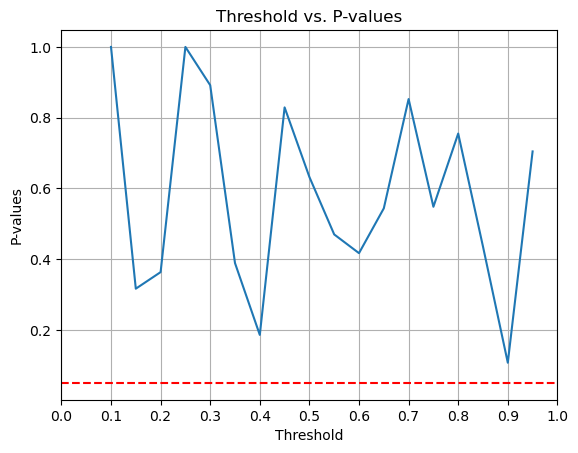

In [186]:
# plot the pvalues
plot_pvalues(threshold,pvalues)

In [187]:
# define the x range
x_min, x_max = 0, 1.0
x_range = np.arange(x_min,x_max,0.1)
y_min, y_max = 0, 1.0
y_range = np.arange(y_min,y_max,0.1)

In [188]:
# 2024.01.08 define the plot function and merge it in the final canvas
# write a function to plot the p-values
def plot1():
    # plot the threshold vs. p-values
    # plt.figure(figsize=(6, 6))
    p_values = compare_prop(threshold=threshold, df1=lr_blind, df2=lr_aware)
    plt.plot(threshold, p_values)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    # plt.xlabel('Threshold')
    # plt.ylabel('P-values')
    plt.title('Sensitivity')
    plt.xticks(x_range)
    
    plt.tick_params(axis='x', which='both', labelbottom=False)
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.grid()

def plot2():
    # plot the threshold vs. p-values
    # plt.figure(figsize=(6, 6))
    p_values = compare_prop_acc(threshold=threshold, df1=lr_blind, df2=lr_aware)
    plt.plot(threshold, p_values)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    # plt.xlabel('Threshold')
    # plt.ylabel('P-values')
    plt.title('Accuracy')
    plt.xticks(x_range)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.grid()

In [189]:
# 2024.01.08 define the plot function and merge it in the final canvas
# write a function to plot the p-values
def plot3():
    # plot the threshold vs. p-values
    # plt.figure(figsize=(6, 6))
    p_values = compare_prop(threshold=threshold, df1=nn_blind, df2=nn_aware)
    plt.plot(threshold, p_values)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    # plt.xlabel('Threshold')
    # plt.ylabel('P-values')
    #plt.title('Threshold vs. P-values')
    plt.xticks(x_range)
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.grid()

## 2.0 Compare the Accuracy between the aware and blind models

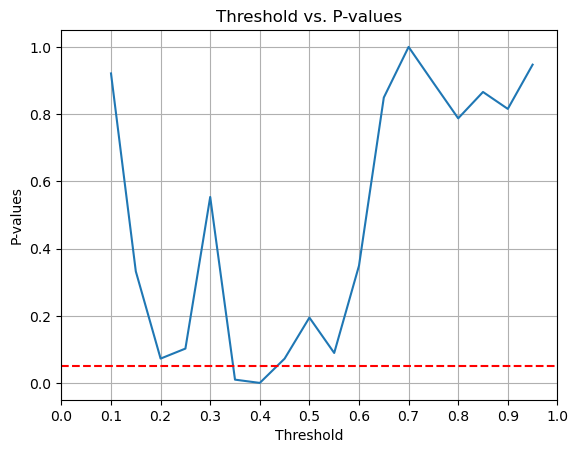

In [190]:
pvalues = compare_prop_acc(threshold=threshold, df1=nn_blind, df2=nn_aware)
plot_pvalues(threshold,pvalues)

In [191]:
# 2024.01.08 define the plot function and merge it in the final canvas
# write a function to plot the p-values
def plot4():
    # plot the threshold vs. p-values
    # plt.figure(figsize=(6, 6))
    p_values = compare_prop_acc(threshold=threshold, df1=nn_blind, df2=nn_aware)
    plt.plot(threshold, p_values)
    plt.xlim(x_min,x_max)
    plt.ylim(y_min,y_max)
    # plt.xlabel('Threshold')
    # plt.ylabel('P-values')
    # plt.title('Threshold vs. P-values')
    plt.xticks(x_range)
    plt.tick_params(axis='y', which='both', labelleft=False)
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.grid()

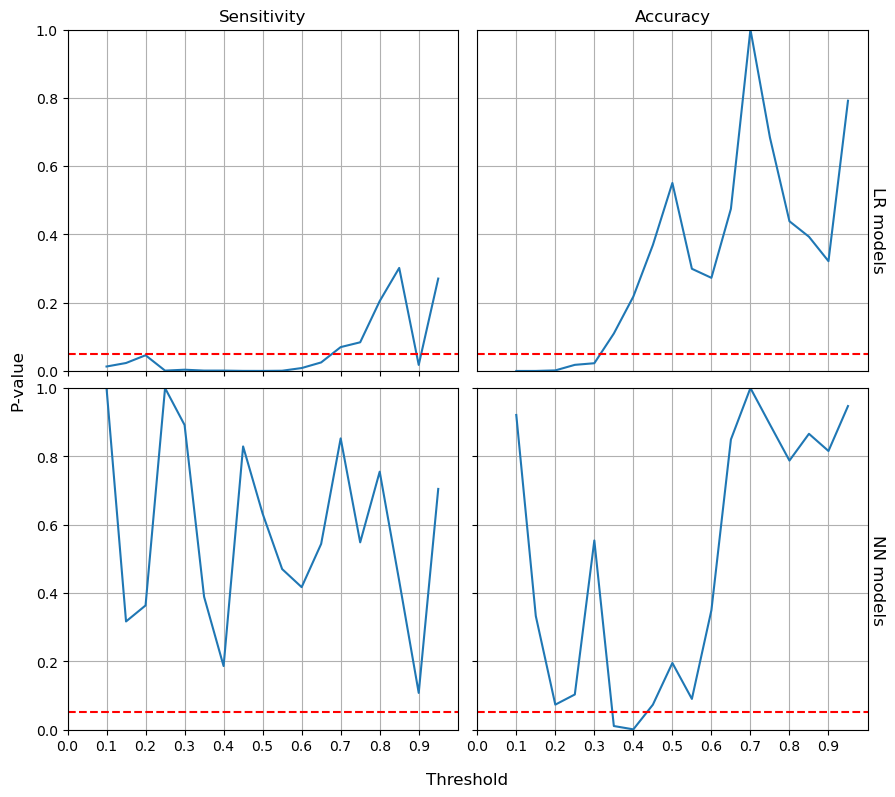

In [192]:
plt.figure(figsize=(10, 10))  # Adjust the size as needed
plt.subplot(2, 2, 1)
plot1()
plt.subplot(2, 2, 2)
plot2()
plt.subplot(2, 2, 3)
plot3()
plt.subplot(2, 2, 4)
plot4()
# Adjust the spacing
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2, wspace=0.05, hspace=0.05)

# Add unified x-axis and y-axis labels
plt.figtext(0.5, 0.15, 'Threshold', ha='center', va='center', fontsize=12)
plt.figtext(0.05, 0.55, 'P-value', ha='center', va='center', rotation='vertical', fontsize=12)
plt.figtext(0.91, 0.70, 'LR models', ha='center', va='center', rotation=270,fontsize=12)
plt.figtext(0.91, 0.35, 'NN models', ha='center', va='center', rotation=270,fontsize=12)
plt.show()